GPT4O

In [2]:
pip install google.colab

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


In [3]:
from google.colab import output

ModuleNotFoundError: No module named 'google.colab'

In [4]:
!pip install ipywidgets ipycanvas matplotlib plotly
output.clear()

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ------------------- -------------------- 9.4/19.1 MB 45.2 MB/s eta 0:00:01
   ---------------------------------------  18.6/19.1 MB 45.2 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 37.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.2 MB/s eta 0:00:00


NameError: name 'output' is not defined

IntSlider(value=3, description='Input Neurons', max=10, min=1)

IntSlider(value=5, description='Hidden Neurons', max=10, min=1)

IntSlider(value=1, description='Output Neurons', max=10, min=1)

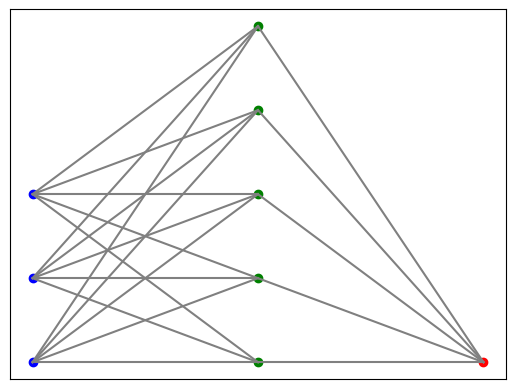

In [5]:
#@title part 1
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Basic neuron visualization
def plot_network(num_inputs, num_hidden, num_outputs):
    fig, ax = plt.subplots()

    # Input layer
    for i in range(num_inputs):
        ax.plot([0], [i], 'o', color='blue')

    # Hidden layer
    for j in range(num_hidden):
        ax.plot([1], [j], 'o', color='green')

    # Output layer
    for k in range(num_outputs):
        ax.plot([2], [k], 'o', color='red')

    # Connecting layers
    for i in range(num_inputs):
        for j in range(num_hidden):
            ax.plot([0, 1], [i, j], color='gray')
    for j in range(num_hidden):
        for k in range(num_outputs):
            ax.plot([1, 2], [j, k], color='gray')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Sliders to adjust the number of neurons
input_slider = widgets.IntSlider(value=3, min=1, max=10, description='Input Neurons')
hidden_slider = widgets.IntSlider(value=5, min=1, max=10, description='Hidden Neurons')
output_slider = widgets.IntSlider(value=1, min=1, max=10, description='Output Neurons')

# Function to update plot on slider change
def update_plot(change):
    plot_network(input_slider.value, hidden_slider.value, output_slider.value)

# Display UI
input_slider.observe(update_plot, names='value')
hidden_slider.observe(update_plot, names='value')
output_slider.observe(update_plot, names='value')

display(input_slider, hidden_slider, output_slider)
update_plot(None)  # Initial plot


In [ ]:
#@title part 2
from ipycanvas import Canvas
import time
import numpy as np

# Initialize Canvas
canvas = Canvas(width=400, height=300)

# Function to simulate neural network forward pass
def forward_pass(canvas, num_inputs, num_hidden, num_outputs):
    canvas.clear()

    # Draw input neurons
    for i in range(num_inputs):
        canvas.fill_circle(50, 50 + i*50, 10)

    # Draw hidden neurons
    for j in range(num_hidden):
        canvas.fill_circle(200, 50 + j*50, 10)

    # Draw output neurons
    for k in range(num_outputs):
        canvas.fill_circle(350, 50 + k*50, 10)

    # Connect layers with lines (weights)
    for i in range(num_inputs):
        for j in range(num_hidden):
            canvas.stroke_line(50, 50 + i*50, 200, 50 + j*50)
    for j in range(num_hidden):
        for k in range(num_outputs):
            canvas.stroke_line(200, 50 + j*50, 350, 50 + k*50)

# Function to run the forward pass
def simulate_network(*args):
    forward_pass(canvas, input_slider.value, hidden_slider.value, output_slider.value)

# Add Button for Forward Pass
button = widgets.Button(description="Run Forward Pass")
button.on_click(simulate_network)

# Display widgets and canvas
display(canvas)
display(button)


Canvas(height=300, width=400)

Button(description='Run Forward Pass', style=ButtonStyle())

GPT4o1

In [ ]:
pip install ipywidgets numpy matplotlib


In [1]:
jupyter nbextension enable --py widgetsnbextension


SyntaxError: invalid syntax (629580002.py, line 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown
import ipywidgets as widgets


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


In [4]:
def neural_network(X, weights, biases, activation_func):
    z = np.dot(X, weights) + biases
    return activation_func(z)


In [5]:
# Define the input data
X = np.linspace(-10, 10, 400).reshape(-1, 1)


In [6]:
def interactive_plot(weight=1.0, bias=0.0, activation='sigmoid'):
    # Select activation function
    if activation == 'sigmoid':
        act_func = sigmoid
    elif activation == 'tanh':
        act_func = tanh
    elif activation == 'relu':
        act_func = relu

    # Compute neural network output
    weights = np.array([[weight]])
    biases = np.array([bias])
    y = neural_network(X, weights, biases, act_func)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(X, y, label=f'Activation: {activation}')
    plt.title('Neural Network Output')
    plt.xlabel('Input X')
    plt.ylabel('Output Y')
    plt.grid(True)
    plt.legend()
    plt.show()


In [7]:
weight_slider = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Weight:')
bias_slider = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Bias:')
activation_dropdown = Dropdown(options=['sigmoid', 'tanh', 'relu'], value='sigmoid', description='Activation:')


In [8]:
interact(
    interactive_plot,
    weight=weight_slider,
    bias=bias_slider,
    activation=activation_dropdown
)


interactive(children=(FloatSlider(value=1.0, description='Weight:', max=5.0, min=-5.0), FloatSlider(value=0.0,…

<function __main__.interactive_plot(weight=1.0, bias=0.0, activation='sigmoid')>

In [9]:
def two_layer_nn(X, weights1, biases1, weights2, biases2, activation_func):
    # First layer
    z1 = np.dot(X, weights1) + biases1
    a1 = activation_func(z1)

    # Second layer
    z2 = np.dot(a1, weights2) + biases2
    output = activation_func(z2)
    return output


In [10]:
def interactive_two_layer(weight1=1.0, bias1=0.0, weight2=1.0, bias2=0.0, activation='sigmoid'):
    # Select activation function
    if activation == 'sigmoid':
        act_func = sigmoid
    elif activation == 'tanh':
        act_func = tanh
    elif activation == 'relu':
        act_func = relu

    # Weights and biases for two layers
    weights1 = np.array([[weight1]])
    biases1 = np.array([bias1])
    weights2 = np.array([[weight2]])
    biases2 = np.array([bias2])

    # Compute neural network output
    y = two_layer_nn(X, weights1, biases1, weights2, biases2, act_func)

    # Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(X, y, label=f'Activation: {activation}')
    plt.title('Two-Layer Neural Network Output')
    plt.xlabel('Input X')
    plt.ylabel('Output Y')
    plt.grid(True)
    plt.legend()
    plt.show()


In [11]:
weight1_slider = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Weight1:')
bias1_slider = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Bias1:')
weight2_slider = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Weight2:')
bias2_slider = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Bias2:')
activation_dropdown = Dropdown(options=['sigmoid', 'tanh', 'relu'], value='sigmoid', description='Activation:')


In [12]:
interact(
    interactive_two_layer,
    weight1=weight1_slider,
    bias1=bias1_slider,
    weight2=weight2_slider,
    bias2=bias2_slider,
    activation=activation_dropdown
)


interactive(children=(FloatSlider(value=1.0, description='Weight1:', max=5.0, min=-5.0), FloatSlider(value=0.0…

<function __main__.interactive_two_layer(weight1=1.0, bias1=0.0, weight2=1.0, bias2=0.0, activation='sigmoid')>

In [16]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------  10.7/11.0 MB 51.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 36.2 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ----------- ---------------------------- 12.3/44.5 MB 59.4 MB/s eta 0:00:01
   ----------------------- ---------------- 26.5/44.5 MB 62.1 MB/s eta 0:00:01
   ----------------------------------- ---- 39.8/44.5 MB 61.8 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 52.5 MB/s eta 0:00:00
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X_blob, y_blob = make_blobs(n_samples=200, centers=2, random_state=42)


In [18]:
def plot_decision_boundary(weight1, weight2, bias, activation='sigmoid'):
    # Select activation function
    if activation == 'sigmoid':
        act_func = sigmoid
    elif activation == 'tanh':
        act_func = tanh
    elif activation == 'relu':
        act_func = relu

    # Create meshgrid
    x_min, x_max = X_blob[:, 0].min() - 1, X_blob[:, 0].max() + 1
    y_min, y_max = X_blob[:, 1].min() - 1, X_blob[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Flatten and stack grid
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Compute neural network output
    weights = np.array([weight1, weight2])
    biases = bias
    Z = neural_network(grid, weights, biases, act_func)
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
    plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, edgecolor='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [19]:
weight1_slider = FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='Weight1:')
weight2_slider = FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description='Weight2:')
bias_slider = FloatSlider(value=0.0, min=-10.0, max=10.0, step=0.1, description='Bias:')
activation_dropdown = Dropdown(options=['sigmoid', 'tanh', 'relu'], value='sigmoid', description='Activation:')


In [20]:
interact(
    plot_decision_boundary,
    weight1=weight1_slider,
    weight2=weight2_slider,
    bias=bias_slider,
    activation=activation_dropdown
)


interactive(children=(FloatSlider(value=1.0, description='Weight1:', max=10.0, min=-10.0), FloatSlider(value=1…

<function __main__.plot_decision_boundary(weight1, weight2, bias, activation='sigmoid')>

In [21]:
from ipywidgets import HBox, VBox

# Arrange widgets
ui = VBox([
    HBox([weight1_slider, weight2_slider]),
    HBox([bias_slider, activation_dropdown])
])

# Update interact function
interactive_plot_decision_boundary = interact(
    plot_decision_boundary,
    weight1=weight1_slider,
    weight2=weight2_slider,
    bias=bias_slider,
    activation=activation_dropdown
)

display(ui, interactive_plot_decision_boundary)


interactive(children=(FloatSlider(value=1.0, description='Weight1:', max=10.0, min=-10.0), FloatSlider(value=1…

<function __main__.plot_decision_boundary(weight1, weight2, bias, activation='sigmoid')>

In [ ]:
!pip install voila
output.clear()

In [23]:
voila your_notebook.ipynb

SyntaxError: invalid syntax (429124548.py, line 1)